# Exploration de données du système Ford GoBike
## Par Medi VANKEMBO

## Introduction
Ford GoBike est un système de données qui comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco. Avec environ 20 000 vélos et plus de 1 300 stations, Il a été conçu pour les déplacements rapides et pratiques, et constitue un moyen amusant et abordable de se déplacer en ville.

## Préparation des données


A travers cette section, nous allons charger nos données, étudier ses propriétés(caractéristiques), faire quelques opérations de nettoyage si nécessaire. Nous allons aussi répondre à certaines questions qui décrivent les objectifs qui nous poussent à réaliser cette exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline
pd.set_option('display.max_columns', 23) # Augmenter la limite de colonnes à afficher par défaut.
pd.options.mode.chained_assignment = None  # Disable warnings

In [2]:
# Load data from csv file and display some firsts rows
go_bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
go_bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Get informations of our dataframe
go_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
go_bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


>Le but à ce niveau est de comprendre le jeu de données que nous avons à notre possession, tout en répondant aux questions suivante :

### Quelle est la structure de ce jeu de données ?

Notre ensemble de données est constitué de 183412 enregistrements et 16 colonnes qui sont :

- **duration_sec**(int64) : La durée du trajet parcouru en seconde
- **start_time**(object) : Le moment(Date + Heure) auquel on débute la course(Trajet)
- **end_time**(object) : Le moment(Date + Heure) auquel on finit la course(Trajet)
- **start_station_id**(float64) : L'identifiant de la station de départ
- **start_station_name**(object) : Le nom de la station de départ
- **start_station_latitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) de départ sur l'axe des y
- **start_station_longitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) de départ sur l'axe des x
- **end_station_id**(float64) : L'identifiant de la station d'arrivée
- **end_station_name**(object) : Le nom de la station d'arrivée
- **end_station_latitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) d'arrivée sur l'axe des y
- **end_station_longitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) d'arrivée sur l'axe des x
- **bike_id**(int64) : L'identifiant du vélo
- **user_type**(object) : Le type de cycliste. Soit Abonné, soit Client(Location pour une courte durée, environ 3 jours maximum)
- **member_birth_year**(float64) : Année de naissance du cycliste
- **member_gender**(object) : Genre(Sexe) du cycliste
- **bike_share_for_all_trip**(object) : Détermine si le vélo est en libre-service pour tous les trajets. True(Yes ou 1) pour affirmer, et False(No, 0)pour signaler que le vélo n'est pas en libre-service pour tous les trajets

### Quelles sont les principales caractéristiques qui nous intéressantent dans ce jeu de données ?

Notre intérêt se situe à deux niveaux :
1. Y a-t-il un lien entre le taux de traffic et les autres caractéristiques de cet ensemble de données ?
2. Existe-t-il une relation entre la durée de trajet et les autres caractéristiques ?

### Quelles sont les caractéristiques de l'ensemble de données qui, selon nous, peuvent nous aider à étudier la ou les caractéristiques qui nous intéressent ?

- **Première problématique**<br>
Je pense que le temps(Heure de la journée, les jours de la semaine, les mois de l'année) a une influence sur le taux de traffic. Nous pouvons aussi associer à cela les trajets. On peut ajouter les coordonnées géographiques(longitude et latitude) peuvent également montrer les zones de forts fraffics.
- **Deuxième problématique**<br>
Quant à la durée de trajet, elle peut être liée au temps(Heure de la journée, les jours de la semaine, les mois de l'année), mais également au type de cycliste, à l'année de naissance du cycliste, à son genre(sexe), au fait que le vélo soit en libre-service pour tous les trajets ou pas.

### Nettoyage des données

Après avoir pris  connaissance de la structure de notre dataframe, nous allons proceder à quelques opérations de nettoyage afin d'avoir une structure beaucoup plus propre et faciliter les travaux d'exploration.<br>
Nous allons réaliser les opérations suivantes :
- Supprimer les lignes contenant des valeurs manquantes
- Changer de type de données
- Supprimer les colonnes que nous estimons n'être pas importantes pour nos analyses
- Créer des colonnes temporelles à partir des colonnes des dates(start_date et end_date) afin de mieux les explorer

#### Changement de type de données

In [5]:
# Make copies of original pieces of data before any manipulation
ford_go_bike = go_bike_data.copy()

#### Suppression des lignes contenant des valeurs nulles

In [6]:
# Delete columns
ford_go_bike.dropna(inplace=True)

# Check the result
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
# Convert object dtype to datetime dtype for the columns which contain date
ford_go_bike.start_time = pd.to_datetime(ford_go_bike.start_time)
ford_go_bike.end_time = pd.to_datetime(ford_go_bike.end_time)

# Check the result
print("start_time :", ford_go_bike.dtypes.start_time)
print("end_time :",ford_go_bike.dtypes.end_time)

start_time : datetime64[ns]
end_time : datetime64[ns]


In [8]:
# Convert float64 dtype to int64 dtype for the column member_birth_year
ford_go_bike['member_birth_year'] = ford_go_bike['member_birth_year'].astype('int')
# Check the result
print("member_birth_year :", ford_go_bike.dtypes.member_birth_year)

member_birth_year : int64


In [9]:
# Convert object dtype to boolean dtype for the bike_share_for_all_trip column
ford_go_bike.bike_share_for_all_trip = ford_go_bike.bike_share_for_all_trip.map({'Yes' : True, 'No':False})

# Check the result
print("bike_share_for_all_trip :", ford_go_bike.dtypes.bike_share_for_all_trip)
ford_go_bike.head()

bike_share_for_all_trip : bool


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,False


#### Suppression des colonnes non pertinentes

In [10]:
# Delete columns
ford_go_bike.drop('start_station_id', inplace=True, axis=1)
ford_go_bike.drop('end_station_id', inplace=True, axis=1)
ford_go_bike.drop('bike_id', inplace=True, axis=1)

# Check the result
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   user_type                174952 non-null  object        
 10  member_birth_year        174952 non-null  int64         
 11  member_gender            174952 non-null  object        
 12  bike_share_for_a

#### Création des nouvelles colonnes
- Pour chaque colonne de date(start_date et end_data), extraire les données pour créer les colonnes suivantes:
- weekday
- day
- month
- hour
- minute

In [11]:
# Get weekday, day, hour and minute from start_time
ford_go_bike['start_weekday'] = ford_go_bike['start_time'].dt.day_name()
ford_go_bike['start_day'] = ford_go_bike['start_time'].dt.day
ford_go_bike['start_month'] = ford_go_bike['start_time'].dt.month
ford_go_bike['start_hour'] = ford_go_bike['start_time'].dt.hour
ford_go_bike['start_minute'] = ford_go_bike['start_time'].dt.minute

# Get weekday, day, hour and minute from end_time
ford_go_bike['end_weekday'] = ford_go_bike['end_time'].dt.day_name()
ford_go_bike['end_day'] = ford_go_bike['end_time'].dt.day
ford_go_bike['end_month'] = ford_go_bike['end_time'].dt.month
ford_go_bike['end_hour'] = ford_go_bike['end_time'].dt.hour
ford_go_bike['end_minute'] = ford_go_bike['end_time'].dt.minute

# Check result
ford_go_bike.head(10)

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_weekday,start_day,start_month,start_hour,start_minute,end_weekday,end_day,end_month,end_hour,end_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984,Male,False,Thursday,28,2,17,32,Friday,1,3,8,1
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972,Male,False,Thursday,28,2,12,13,Friday,1,3,5,24
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989,Other,False,Thursday,28,2,17,54,Friday,1,3,4,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974,Male,True,Thursday,28,2,23,54,Friday,1,3,0,20
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,Subscriber,1959,Male,False,Thursday,28,2,23,49,Friday,1,3,0,19
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,37.317298,-121.884995,San Jose Diridon Station,37.329732,-121.901782,Subscriber,1983,Female,False,Thursday,28,2,23,55,Friday,1,3,0,14
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,37.795393,-122.404770,Valencia St at 21st St,37.756708,-122.421025,Subscriber,1989,Male,False,Thursday,28,2,23,41,Friday,1,3,0,8
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,37.795393,-122.404770,Valencia St at 21st St,37.756708,-122.421025,Subscriber,1988,Other,False,Thursday,28,2,23,41,Friday,1,3,0,7
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,37.788975,-122.403452,Mission Playground,37.759210,-122.421339,Subscriber,1992,Male,False,Thursday,28,2,23,49,Friday,1,3,0,7
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,Jones St at Post St,37.787327,-122.413278,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,Subscriber,1996,Female,True,Thursday,28,2,23,57,Friday,1,3,0,5


### Structure des données après les travaux de nettoyage

In [12]:
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   user_type                174952 non-null  object        
 10  member_birth_year        174952 non-null  int64         
 11  member_gender            174952 non-null  object        
 12  bike_share_for_a

>Notre ensemble de données a maintenant 183412 enregistrements, avec cette fois-ci 23 colonnes qui sont :

- **duration_sec**(int64) : La durée du trajet parcouru en seconde
- **start_time**(datetime64) : Le moment(Date + Heure) auquel on débute la course(Trajet)
- **end_time**(datetime64) : Le moment(Date + Heure) auquel on finit la course(Trajet)
- **start_station_name**(object) : Le nom de la station de départ
- **start_station_latitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) de départ sur l'axe des y
- **start_station_longitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) de départ sur l'axe des x
- **end_station_name**(object) : Le nom de la station d'arrivée
- **end_station_latitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) d'arrivée sur l'axe des y
- **end_station_longitude**(float64) : La coordonnée géographique qui définit l'emplacement de la station(lieu) d'arrivée sur l'axe des x
- **user_type**(object) : Le type de cycliste. Soit Abonné, soit Client(Location pour une courte durée, environ 3 jours maximum)
- **member_birth_year**(int64) : Année de naissance du cycliste
- **member_gender**(object) : Genre(Sexe) du cycliste
- **bike_share_for_all_trip**(bool) : Détermine si le vélo est en libre-service pour tous les trajets. True(Yes ou 1) pour affirmer, et False(No, 0)pour signaler que le vélo n'est pas en libre-service pour tous les trajets
- **start_weekday**(object) : Le jour de la semaine à laquelle le trajet a débuté, entre Lundi et Dimanche
- **start_day**(int64) : Le jour du mois auquel le trajet a débuté, 1 pour le 1er et 28, vu que le mois de février n'avait que 28 jours pour l'année 2019
- **start_month**(int64) : Le mois de l'année auquel le trajet a débuté, 2 pour Février et 3 pour Mai
- **start_hour**(int64) : L'heure à laquelle le trajet a débuté, de 0 à 23 heures
- **start_minute**(int64) : La minute à laquelle le trajet a débuté, de 0 à 59
- **end_weekday**(object) : Le jour de la semaine à laquelle le trajet a pris fin, entre Lundi et Dimanche
- **end_day**(int64) : Le jour du mois auquel le trajet a pris fin, 1 pour le 1er et 28, vu que le mois de février n'avait que 28 jours pour l'année 2019
- **end_month**(int64) : Le mois de l'année auquel le trajet a pris fin, 2 pour Février et 3 pour Mai
- **end_hour**(int64) : L'heure à laquelle le trajet a pris fin, de 0 à 23 heures
- **end_minute**(int64) : La minute à laquelle le trajet a pris fin, de 0 à 59


## Univariate Exploration

Dans cette section, nous allons procéder à l'exploration des distributions de caractéristiques de façon individuelle afin de mieux les comprendre.
Nous commençons avec la distribution de la principale variable d'intérêt : duration_sec


> La question est de savoir quelles sont les fréqences des durées de courses ?

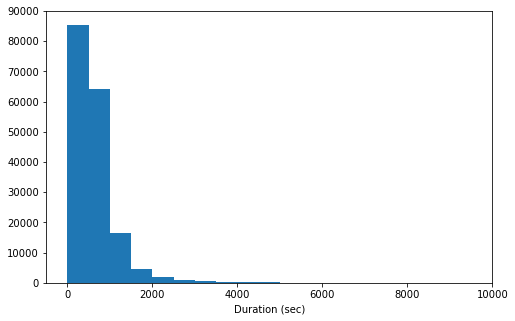

In [13]:
# start with a standard-scaled plot
binsize = 500
max_duration = ford_go_bike['duration_sec'].max()
bins = np.arange(0, max_duration + binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(ford_go_bike.duration_sec, bins = bins)
plt.xlabel('Duration (sec)')
plt.axis([-500, 10000, 0, 90000])
plt.show()



>Cette visualisation nous montre que la majeure de courses ont une durées entre 0 - 2500 secondes.

> Comment sont reparties les fréquences  dans la distribution des dates ?

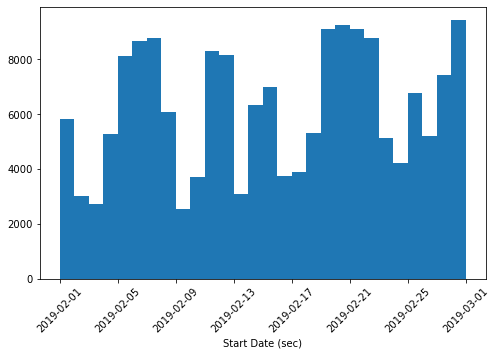

In [14]:
# start with a standard-scaled plot

plt.figure(figsize=[8, 5])
plt.hist(ford_go_bike.start_time, bins = 28)
plt.xlabel('Start Date (sec)')
plt.xticks(rotation=45)
plt.show()

>Cette visualisation ne nous donne pas assez d'informations pertinentes. D'où, nous allons creuser en profondeur en analysant les données extraites.

>Que nous révèle la distribution sur les jours de la semaine ? 

In [15]:
sb.set_palette("pastel")
base_color = sb.color_palette()[0]

>Nous voyons bien que les courses sont réalisées beacoup plus le Jeudi et le Mardi, et moins plus le weekend, Samedi et Dimanche.

>Que pouvons-nous dire de la distribution des heures du début des courses ?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


/home/user/anaconda3/envs/udacity/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


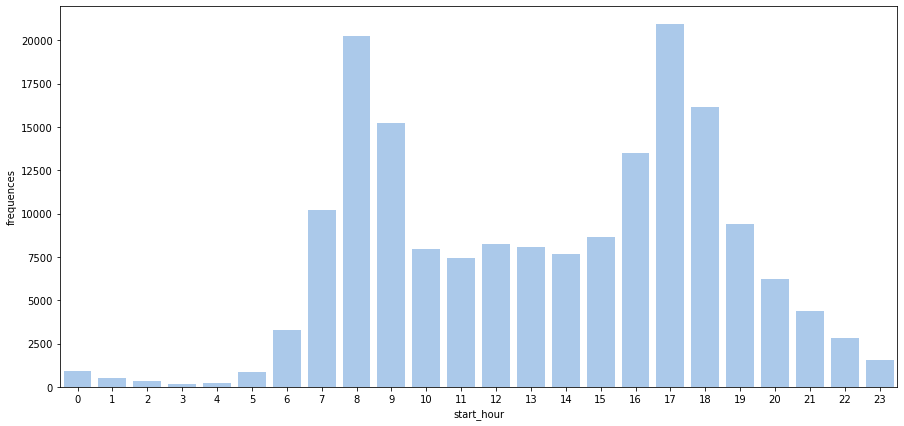

In [16]:
# Get the sum of each value for the start_weekday column
start_hour_values = ford_go_bike.start_hour.value_counts()

# Get the unique values of the column weekday in desc frequences order 
start_hour_values_order = sorted(start_hour_values.index)
print(start_hour_values_order)

# Plot the distribution
plt.figure(figsize=[15, 7])
sb.barplot(start_hour_values.index.values, start_hour_values, color=base_color, order=start_hour_values_order)
plt.ylabel('frequences')
plt.xlabel('start_hour');

start_hour
0       893
1       525
2       355
3       164
4       227
5       866
6      3293
7     10231
8     20227
9     15204
10     7970
11     7461
12     8220
13     8098
14     7677
15     8646
16    13473
17    20904
18    16118
19     9424
20     6211
21     4400
22     2793
23     1572
dtype: int64


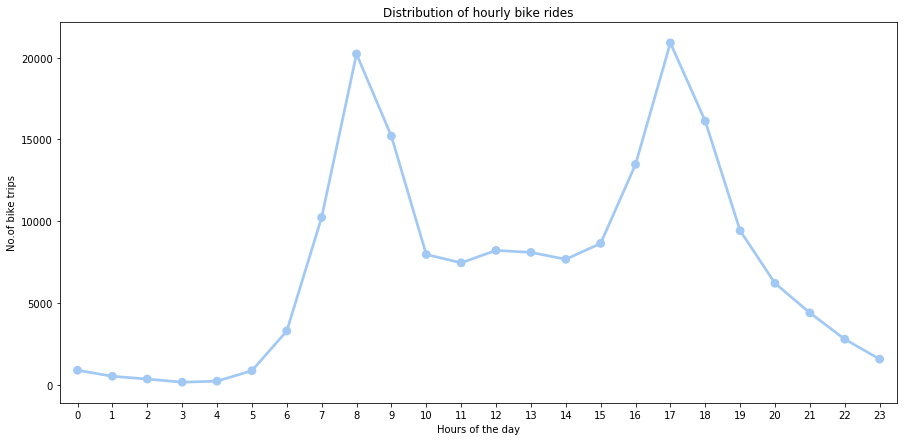

In [17]:
start_hour_count=ford_go_bike.groupby('start_hour').size()
print(start_hour_count)
plt.figure(figsize=[15, 7])
sb.pointplot(data = ford_go_bike, x =start_hour_count.index, y=start_hour_count, color=base_color);
plt.title("Distribution of hourly bike rides");
plt.ylabel("No.of bike trips");
plt.xlabel("Hours of the day");

>Que dire de la distribution de type d'utilisateur ?

/home/user/anaconda3/envs/udacity/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


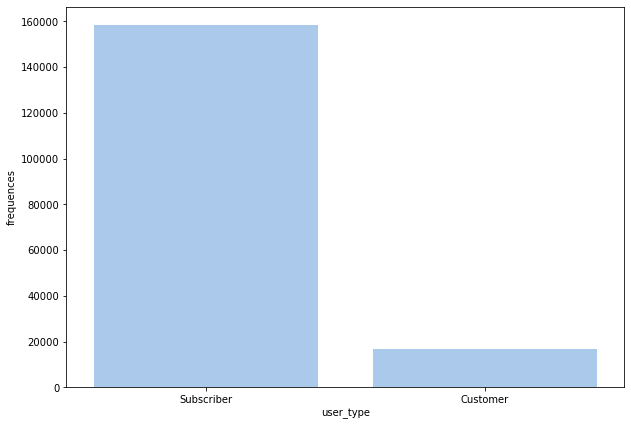

In [18]:
user_type_count = ford_go_bike.user_type.value_counts()
plt.figure(figsize=[10, 7])
sb.barplot(user_type_count.index.values, user_type_count, color=base_color)
plt.ylabel('frequences')
plt.xlabel('user_type');

member_birth_year

In [34]:
# This function takes as parameter the list of user ages, 
# and returns a list of ages of these users

def getUserAges(years):
    ages = []
    for year in years:
        age = 2018 - year
        ages.append(age)
    return ages

ages : Int64Index([ 30,  25,  29,  28,  27,  26,  31,  32,  24,  23,  33,  34,  35,
             38,  36,  22,  37,  39,  21,  20,  40,  41,  44,  19,  43,  42,
             45,  50,  47,  46,  18,  48,  53,  49,  51,  54,  55,  52,  56,
             57,  61,  58,  59,  60,  62,  64,  66,  67,  68,  65,  71,  63,
             73,  69,  87, 118,  70,  17,  75,  76,  85,  72,  79, 116,  77,
            117,  80,  98,  84,  74, 140,  88,  90,  91, 108],
           dtype='int64')


/home/user/anaconda3/envs/udacity/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


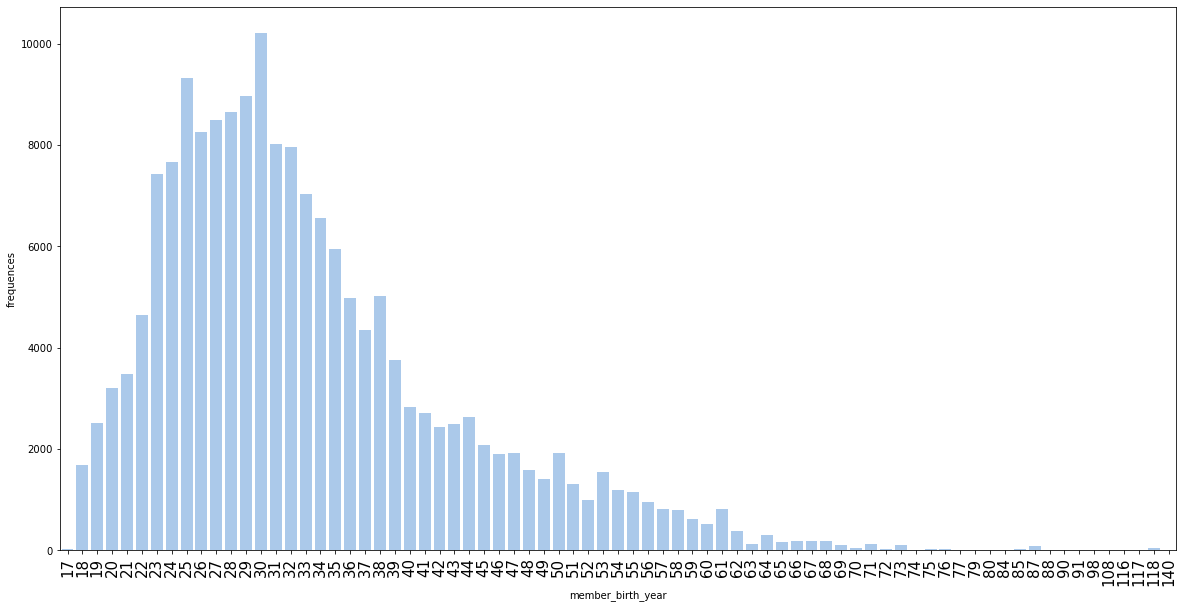

In [63]:
member_birth_year_count = ford_go_bike.member_birth_year.value_counts()
member_birth_year_count.index = getUserAges(member_birth_year_count.index)
print("ages :", member_birth_year_count.index )

plt.figure(figsize=[20, 10])
sb.barplot(member_birth_year_count.index.values, member_birth_year_count, color=base_color)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('frequences')
plt.xlabel('member_birth_year');

In [ ]:
Cette graphique nous montre que la plus grande tranche d'âge qui qui effectue des courses à vélo est entre 17 et 50, avec 

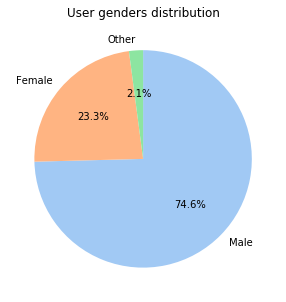

In [88]:
member_gender_count = ford_go_bike.member_gender.value_counts()
plt.figure(figsize=[10, 5])
plt.pie(member_gender_count, labels = member_gender_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.title('User genders distribution');

In [ ]:
bike_share_for_all_trip

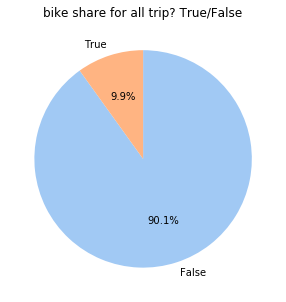

In [87]:
# bike_share_for_all_trip_count = ford_go_bike.bike_share_for_all_trip.value_counts()
# plt.figure(figsize=[10, 5])
# sb.barplot(bike_share_for_all_trip_count.index.values, bike_share_for_all_trip_count, color=base_color)
# plt.xticks(fontsize=15)
# plt.ylabel('frequences')
# plt.xlabel('bike_share_for_all_trip');

bike_share_for_all_trip_count = ford_go_bike.bike_share_for_all_trip.value_counts()
plt.figure(figsize=[10, 5])
plt.pie(bike_share_for_all_trip_count, labels = bike_share_for_all_trip_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('bike share for all trip? True/False');

In [ ]:
# Get the sum of each value for the start_weekday column
weekday_values = ford_go_bike.start_weekday.value_counts()

# Get the unique values of the column weekday in desc frequences order 
weekday_values_order = weekday_values.index
print(weekday_values_order)

# Plot the distribution
plt.figure(figsize=[8, 5])
sb.barplot(weekday_values.index.values, weekday_values, color=base_color, order=weekday_values_order)
#plt.xticks(rotation=45)
#plt.xticks(rotation=45)
for i in range (weekday_values.shape[0]):
    count = weekday_values[i]
    plt.text(i, count+300, count, ha = 'center', va='top')
plt.ylabel('frequences')
plt.xlabel('Start_weekday');

>La figure nous montre que les trajets à velo sont plus intenses le matin entre 7, 8 et 9 heures, et le soir entre 16, 17, 18, voire 19 heures.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
plt.hist(go_bike_data_copy.duration_sec);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [ ]:
# start with a standard-scaled plot
# print(data)
# data_sorted = sorted(data.values)
# print(data_sorted)
# plt.figure(figsize=[8, 5])
# plt.bar(data = ford_go_bike, x='start_weekday', height=40000)
# plt.xlabel('Start weekday (sec)')
# plt.xticks(rotation=45)
# plt.show()